In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\sohan\Downloads\insurance.csv")

# Datset details

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
data.shape

(1338, 7)

In [7]:
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 1338
Number of columns: 7


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Convert features from string(Smoker,Region,Sex) to numerical values

In [11]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [14]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [16]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
data['region']=data['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### Store independent features in 'X' matrix and target feature in 'y' vector

In [18]:
X=data.drop(['charges'],axis=1)
y=data['charges']

### Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Import the models

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Model Training

In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)

svm=SVR()
svm.fit(X_train,y_train)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

## Prediction on test data

In [22]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

In [23]:
df1=pd.DataFrame({'Actual':y_test,'LR':y_pred1,'SVM':y_pred2,'RF':y_pred3,'GBR':y_pred4})

In [24]:
df1

,Actual,LR,SVM,RF,GBR
764,9095.06825,8924.407244,9548.501784,11152.357504,11001.128629
887,5272.17580,7116.295018,9493.253027,5870.980335,5840.174656
890,29330.98315,36909.013521,9648.297116,28106.291095,28001.980112
1293,9301.89355,9507.874691,9555.223014,10257.572427,9745.291602
259,33750.29180,27013.350008,9421.474560,34372.385254,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.419534,47542.324503,45431.423211
575,12222.89830,11814.555568,9625.047904,12679.776032,12465.025294
535,6067.12675,7638.107736,9504.805678,6406.880145,6974.336525
543,63770.42801,40959.081722,9604.855076,46746.095094,47862.047791


## Compare model performance visually

In [25]:
import matplotlib.pyplot as plt

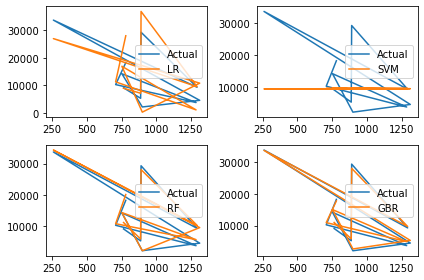

In [26]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['LR'].iloc[0:11],label='LR')
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['SVM'].iloc[0:11],label='SVM')
plt.legend()


plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['RF'].iloc[0:11],label='RF')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['GBR'].iloc[0:11],label='GBR')
plt.legend()

plt.tight_layout()

## Evaluate the models

In [27]:
from sklearn import metrics

In [28]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [29]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07230841842488811 0.8632668905618259 0.8779726251291786


In [30]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [31]:
print(s1,s2,s3,s4)

4186.508898366435 8592.79866979489 2499.021678433894 2447.9515580545844


##### GradienBoostingRegressor is the best model

## Predict charges for new customer

In [32]:
new_data={'age':40,
         'sex':1,
         'bmi':50.30,
         'children':2,
         'smoker':1,
         'region':3}

In [33]:
new_df=pd.DataFrame(new_data,index=[0])

In [34]:
new_df

,age,sex,bmi,children,smoker,region
0,40,1,50.3,2,1,3


In [35]:
new_pred=gr.predict(new_df)
print("Insurance cost for new customer:",new_pred)

Insurance cost for new customer: [44696.28218654]


## Save model using joblib

In [36]:
import joblib

In [37]:
model=joblib.dump(gr,'model_joblib_test')


In [38]:
model=joblib.load('model_joblib_test')

In [39]:
model.predict([[40,1,50.3,2,1,3]])

C:\Users\sohan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([44696.28218654])

# GUI

In [40]:
X=data.drop(['charges'],axis=1)
y=data['charges']

In [41]:
model=GradientBoostingRegressor()
model.fit(X,y)

GradientBoostingRegressor()

In [42]:
import joblib

In [43]:
joblib.dump(model,'insurance_model')

['insurance_model']

In [44]:
joblib.load('insurance_model')

GradientBoostingRegressor()

In [45]:
model.predict([[40,0,55.2,3,0,1]])

C:\Users\sohan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([7370.17113759])

In [46]:
from tkinter import *

In [47]:
import joblib

In [49]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    
    model=joblib.load('insurance_model')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text="Insurance Cost").grid(row=7)
    Label(master,text=result).grid(row=8)

master=Tk()
master.title("Insurance Cost Prediction")
label=Label(master,text="Insurance Cost Prediction",bg='black',fg='white').grid(row=0,columnspan=2)

Label(master,text="Enter your age:").grid(row=1)
Label(master,text="Male or Female[1/0]:").grid(row=2)
Label(master,text="Enter your BMI value:").grid(row=3)
Label(master,text="Enter number of children:").grid(row=4)
Label(master,text="Smoker Yes/No[1/0]").grid(row=5)
Label(master,text="Region[0-3]").grid(row=6)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()